In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11-12-2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11-12-2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11-12-2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11-12-2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11-12-2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1


In [3]:
df.shape

(285807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285807 entries, 0 to 285806
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        285807 non-null  object 
 1   CrimeTime        285807 non-null  object 
 2   CrimeCode        285807 non-null  object 
 3   Location         284184 non-null  object 
 4   Description      285807 non-null  object 
 5   Inside/Outside   281611 non-null  object 
 6   Weapon           97396 non-null   object 
 7   Post             285616 non-null  float64
 8   District         285749 non-null  object 
 9   Neighborhood     284106 non-null  object 
 10  Location 1       284188 non-null  object 
 11  Total Incidents  285807 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 26.2+ MB


In [5]:
df.isnull().sum()

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             1623
Description             0
Inside/Outside       4196
Weapon             188411
Post                  191
District               58
Neighborhood         1701
Location 1           1619
Total Incidents         0
dtype: int64

In [6]:
larcency_df = df[df['CrimeCode'].str.startswith('6')]

In [7]:
larcency_df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
2,11-12-2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11-12-2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11-12-2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1
7,11-12-2016,04:27:00,6D,0 N CONKLING ST,LARCENY FROM AUTO,O,NaN,223.0,SOUTHEASTERN,Baltimore Highlands,"(39.2959100000, -76.5677700000)",1
10,11-12-2016,09:00:00,6D,700 POPLAR GROVE ST,LARCENY FROM AUTO,O,NaN,814.0,SOUTHWESTERN,Franklintown Road,"(39.2966200000, -76.6650800000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
285794,01-01-2011,21:30:00,6J,0 E CROSS ST,LARCENY,I,NaN,942.0,SOUTHERN,Federal Hill,"(39.2768600000, -76.6142900000)",1
285795,01-01-2011,21:40:00,6E,500 W FRANKLIN ST,LARCENY,O,NaN,143.0,CENTRAL,Seton Hill,"(39.2948300000, -76.6233300000)",1
285797,01-01-2011,22:00:00,6D,200 EMORY ST,LARCENY FROM AUTO,O,NaN,941.0,SOUTHERN,Ridgely's Delight,"(39.2861000000, -76.6247400000)",1
285798,01-01-2011,22:00:00,6D,1200 N CALHOUN ST,LARCENY FROM AUTO,O,NaN,743.0,WESTERN,Sandtown-Winchester,"(39.3025800000, -76.6403600000)",1


In [8]:
def get_test_data(df):
    df['CrimeDate'] = pd.to_datetime(df['CrimeDate'],format='mixed')
    df_filtered = df[(df['CrimeDate'].dt.year == 2016)]
    df_grouped = df_filtered.groupby('CrimeDate')['Total Incidents'].sum().reset_index()
    df_grouped.rename(columns={'Total Incidents': 'Total Incidents'}, inplace=True)
    return df_grouped

In [9]:
test_2016_data = get_test_data(larcency_df)
test_2016_data

/tmp/ipykernel_15952/831359372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CrimeDate'] = pd.to_datetime(df['CrimeDate'],format='mixed')


,CrimeDate,Total Incidents
0,2016-01-01,54
1,2016-01-02,41
2,2016-01-03,37
3,2016-01-04,35
4,2016-01-05,37
...,...,...
312,2016-11-08,40
313,2016-11-09,38
314,2016-11-10,40
315,2016-11-11,34


In [10]:
#save the test data
test_2016_data.to_csv('test_2016_data.csv', index=False, encoding='utf-8')

print("DataFrame saved to 'test_2016_data_larcency.csv'")

DataFrame saved to 'test_2016_data_larcency.csv'


In [11]:
test_data = test_2016_data.iloc[:,:-1]
test_actual = test_2016_data.iloc[:,-1]

In [12]:
def get_the_total_incidents(df):
    # Convert 'CrimeDate' to datetime
    df['CrimeDate'] = pd.to_datetime(df['CrimeDate'],format='mixed')
    
    # Filter data for the years 2014 and 2015
    df_filtered = df[(df['CrimeDate'].dt.year >= 2014) & (df['CrimeDate'].dt.year <= 2015)]
    
    # Group by 'CrimeDate' and sum 'Total Incidents'
    df_grouped = df_filtered.groupby('CrimeDate')['Total Incidents'].sum().reset_index()
    
    # Rename the columns for clarity
    df_grouped.rename(columns={'Total Incidents': 'Total Incidents'}, inplace=True)
    
    return df_grouped

In [13]:
new_df_larcency = get_the_total_incidents(larcency_df)
new_df_larcency

/tmp/ipykernel_15952/3281345974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CrimeDate'] = pd.to_datetime(df['CrimeDate'],format='mixed')


,CrimeDate,Total Incidents
0,2014-01-01,46
1,2014-01-02,34
2,2014-01-03,20
3,2014-01-04,37
4,2014-01-05,31
...,...,...
725,2015-12-27,36
726,2015-12-28,39
727,2015-12-29,47
728,2015-12-30,45


In [15]:
new_df_larcency.to_csv('larcency_df.csv', index=False, encoding='utf-8')

print("DataFrame saved to 'larcency_df.csv'")

DataFrame saved to 'larcency_df.csv'


In [16]:
from tensorflow.keras.layers import SimpleRNN,Dense,Dropout
from tensorflow.keras.models import Sequential
rnn_larcency = Sequential([
    SimpleRNN(units = 50, return_sequences = True, input_shape = (1, 1)),#represents the features always
    Dropout(0.2),
    SimpleRNN(units = 50, return_sequences = True, input_shape = (1, 1)),
    Dropout(0.2),
    SimpleRNN(units = 50, return_sequences = True, input_shape = (1, 1)),
    Dropout(0.2),
    Dense(units = 1)
])

2024-08-29 16:23:40.367129: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-29 16:23:40.394175: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-29 16:23:40.861525: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-08-29 16:23:41.350220: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.

In [17]:
burglary_df = df[df['CrimeCode'].str.startswith('5')]
burglary_df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
15,11-12-2016,11:00:00,5A,0 S CARROLLTON AVE,BURGLARY,I,NaN,931.0,SOUTHERN,Hollins Market,"(39.2879600000, -76.6367200000)",1
26,11-12-2016,01:30:00,5A,2700 HUNTINGDON AVE,BURGLARY,I,NaN,511.0,NORTHERN,Remington,"(39.3200000000, -76.6222400000)",1
32,11-12-2016,13:00:00,5A,2500 FRANCIS ST,BURGLARY,I,NaN,733.0,WESTERN,Penn North,"(39.3133100000, -76.6426300000)",1
40,11-12-2016,14:30:00,5A,2100 CORBIN RD,BURGLARY,I,NaN,423.0,NORTHEASTERN,Hamilton Hills,"(39.3603900000, -76.5714200000)",1
43,11-12-2016,15:00:00,5B,1300 CEDARCROFT RD,BURGLARY,I,NaN,414.0,NORTHEASTERN,Idlewood,"(39.3691400000, -76.5882000000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
285752,01-01-2011,16:38:00,5A,3900 BELVIEU AV,BURGLARY,I,NaN,643.0,NORTHWESTERN,Dolfield,"(39.3397000000, -76.6835600000)",1
285759,01-01-2011,17:00:00,5A,6700 HUDSON ST,BURGLARY,I,NaN,243.0,SOUTHEASTERN,Graceland Park,"(39.2839700000, -76.5335200000)",1
285763,01-01-2011,17:00:00,5D,1200 DRUID HILL AV,BURGLARY,I,NaN,123.0,CENTRAL,Upton,"(39.3012900000, -76.6277200000)",1
285767,01-01-2011,18:00:00,5A,3200 HARWELL AV,BURGLARY,I,NaN,432.0,NORTHEASTERN,Belair-Edison,"(39.3217500000, -76.5750800000)",1


In [18]:
new_df_bur = get_the_total_incidents(burglary_df)
new_df_bur

/tmp/ipykernel_15952/3281345974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CrimeDate'] = pd.to_datetime(df['CrimeDate'],format='mixed')


,CrimeDate,Total Incidents
0,2014-01-01,19
1,2014-01-02,28
2,2014-01-03,13
3,2014-01-04,19
4,2014-01-05,14
...,...,...
725,2015-12-27,19
726,2015-12-28,33
727,2015-12-29,20
728,2015-12-30,24


In [19]:
new_df_bur.to_csv('burglary_df.csv', index=False, encoding='utf-8')

print("DataFrame saved to 'burglary_df.csv'")

DataFrame saved to 'burglary_df.csv'


In [20]:
test_2016_data = get_test_data(burglary_df)
test_2016_data

/tmp/ipykernel_15952/831359372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CrimeDate'] = pd.to_datetime(df['CrimeDate'],format='mixed')


,CrimeDate,Total Incidents
0,2016-01-01,18
1,2016-01-02,6
2,2016-01-03,22
3,2016-01-04,24
4,2016-01-05,16
...,...,...
312,2016-11-08,19
313,2016-11-09,26
314,2016-11-10,24
315,2016-11-11,14


In [21]:
test_data_burglary = test_2016_data.iloc[:,:-1]
test_actual_burglary = test_2016_data.iloc[:,-1]

In [22]:
test_2016_data.to_csv('test_2016_burglary_data.csv', index=False, encoding='utf-8')

print("DataFrame saved to 'test_2016_burglary_data.csv'")

DataFrame saved to 'test_2016_burglary_data.csv'


In [23]:
from tensorflow.keras.layers import SimpleRNN,Dense,Dropout
from tensorflow.keras.models import Sequential
rnn_burglary = Sequential([
    SimpleRNN(units = 50, return_sequences = True, input_shape = (1, 1)),#represents the features always
    Dropout(0.2),
    SimpleRNN(units = 50, return_sequences = True, input_shape = (1, 1)),
    Dropout(0.2),
    SimpleRNN(units = 50, return_sequences = True, input_shape = (1, 1)),
    Dropout(0.2),
    Dense(units = 1)
])

In [31]:
models = [
    {'larcency_rnn': rnn_larcency},
    {'burglary_rnn': rnn_burglary}
]
results=[]
def model_train(models, train_data, test_data_x, test_data_y):

    # Convert 'CrimeDate' column to timestamps before training
    train_data['CrimeDate'] = train_data['CrimeDate'].astype(np.int64) // 10**9
    test_data_x['CrimeDate'] = test_data_x['CrimeDate'].astype(np.int64) // 10**9
    
    for model_dict in models:
        for model_name, model in model_dict.items():
            print(f'Training model {model_name}')
            
            # Compile the model
            model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
            print(model.summary())
            
            # Train the model
            history = model.fit(
                train_data.iloc[:, :-1],  # Features
                train_data.iloc[:, -1],   # Target
                epochs=25,
                batch_size=32,
                validation_split=2/9
            )
            
            # Evaluate the model
            test_loss, test_mse = model.evaluate(test_data_x, test_data_y)
            
            # Append results to the global list
            results.append({
                "model_name": model_name,
                "mse": history.history['mean_squared_error'][-1],
                "test_mse": test_mse
            })
            
            # Plot training history
            print(f'Plotting for model {model_name}')
            plt.figure(figsize=(12, 6))
            plt.plot(history.history['mean_squared_error'], label='Training MSE')
            plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
            plt.title(f'Training and Validation MSE for {model_name}')
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.legend()
            plt.grid(True)
            plt.show()

In [28]:
import matplotlib.pyplot as plt

Training model larcency_rnn
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 50)             2600      
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1, 50)             5050      
                                                                 
 dropout_1 (Dropout)         (None, 1, 50)             0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1, 50)             5050      
                                                                 
 dropout_2 (Dropout)         (None, 1, 50)             0         
                                                                 
 dense (Dense)              

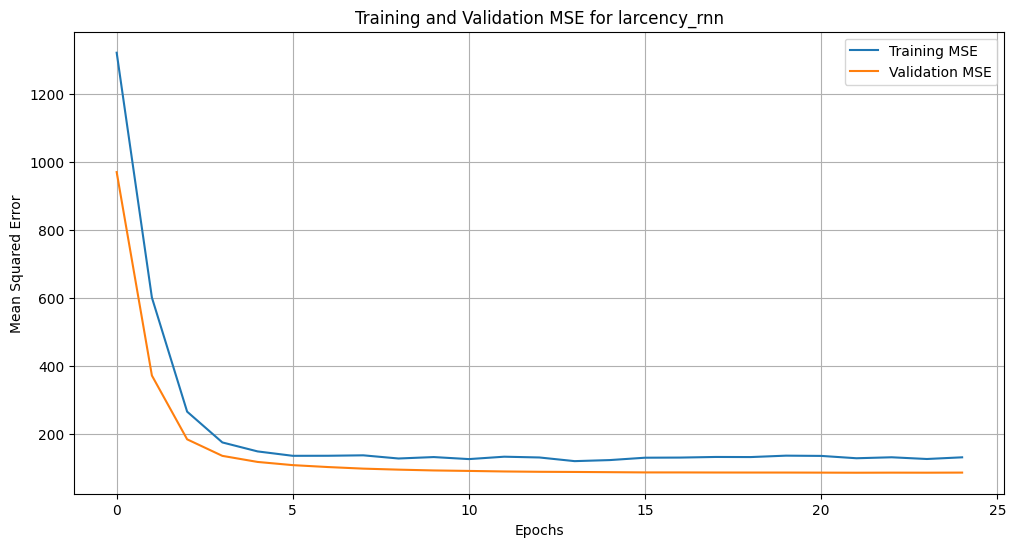

Training model burglary_rnn
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 1, 50)             2600      
                                                                 
 dropout_3 (Dropout)         (None, 1, 50)             0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 1, 50)             5050      
                                                                 
 dropout_4 (Dropout)         (None, 1, 50)             0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1, 50)             5050      
                                                                 
 dropout_5 (Dropout)         (None, 1, 50)             0         
                                                                 
 dense_1 (Dense)          

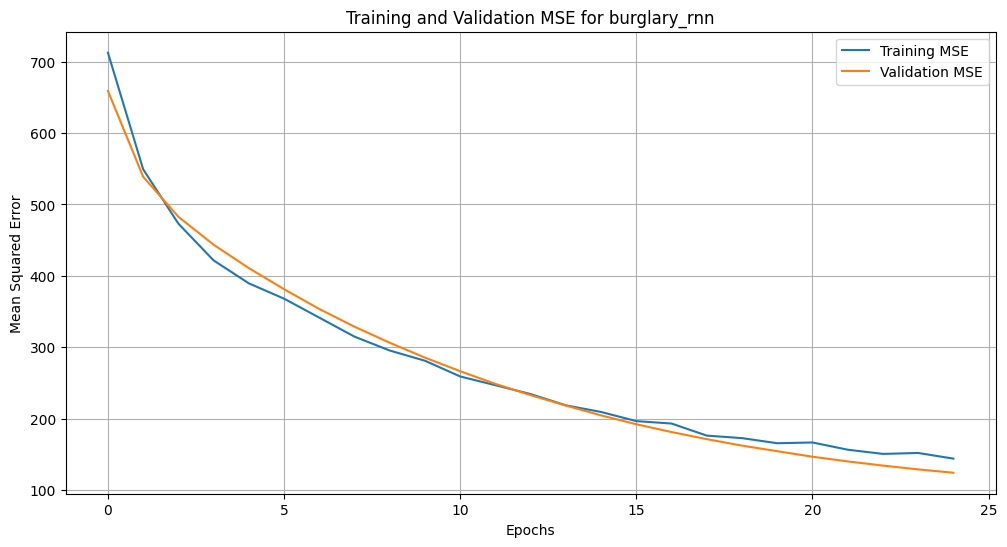

Training model larcency_rnn
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 50)             2600      
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 1, 50)             5050      
                                                                 
 dropout_1 (Dropout)         (None, 1, 50)             0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1, 50)             5050      
                                                                 
 dropout_2 (Dropout)         (None, 1, 50)             0         
                                                                 
 dense (Dense)              

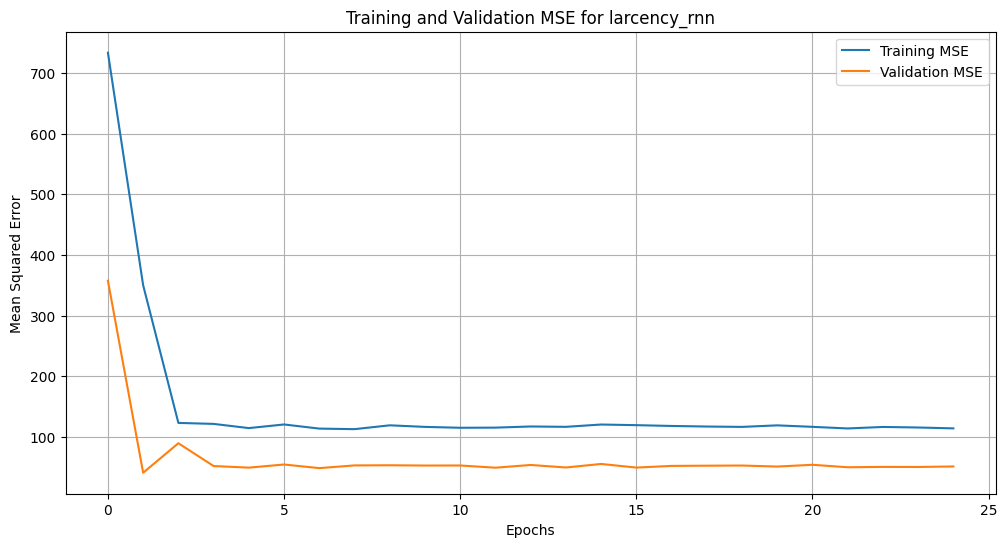

Training model burglary_rnn
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 1, 50)             2600      
                                                                 
 dropout_3 (Dropout)         (None, 1, 50)             0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 1, 50)             5050      
                                                                 
 dropout_4 (Dropout)         (None, 1, 50)             0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1, 50)             5050      
                                                                 
 dropout_5 (Dropout)         (None, 1, 50)             0         
                                                                 
 dense_1 (Dense)          

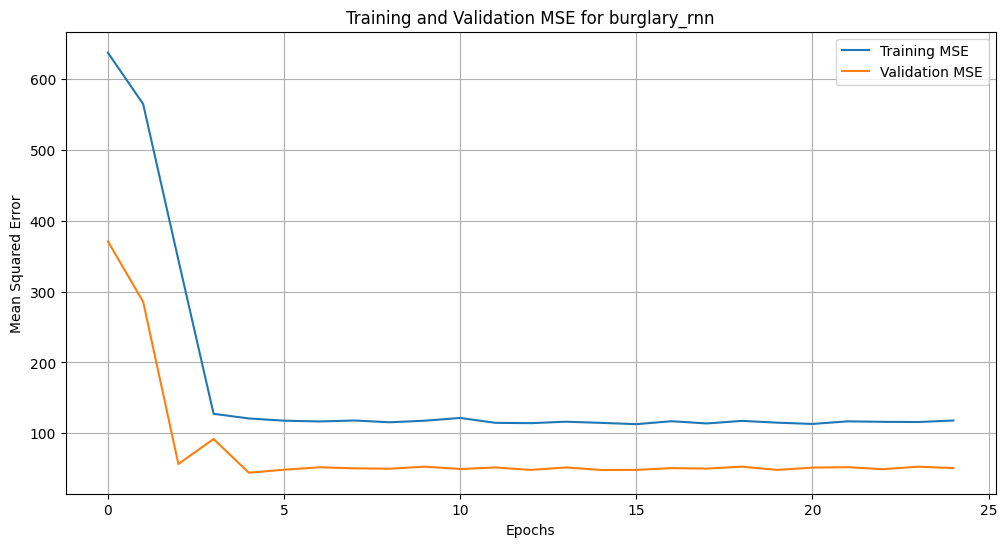

In [32]:
model_train(models,new_df_larcency,test_data,test_actual)
model_train(models,new_df_bur,test_data_burglary,test_actual_burglary)

In [33]:
result_df = pd.DataFrame(results)
result_df

,model_name,mse,test_mse
0,larcency_rnn,131.851868,117.887444
1,burglary_rnn,144.243240,102.067444
2,larcency_rnn,113.856194,84.754204
3,burglary_rnn,118.141563,84.754837
